In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r'E:\Placement predictor dataset\placementdata.csv')
data.head()

In [ ]:
data.info()

In [ ]:
print("Extracurricular Activities Distribution:")
print(data['ExtracurricularActivities'].value_counts())

print("\nPlacement Training Distribution:")
print(data['PlacementTraining'].value_counts())

print("\nPlacement Status Distirbution:")
print(data['PlacementStatus'].value_counts())

In [ ]:
numerical_cols = data.select_dtypes(include = ['int64','float64']).columns
categorical_cols = data.select_dtypes(include = ['object']).columns

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate (numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde = True, bins = 20)
    plt.title(f"distribution of {col}")

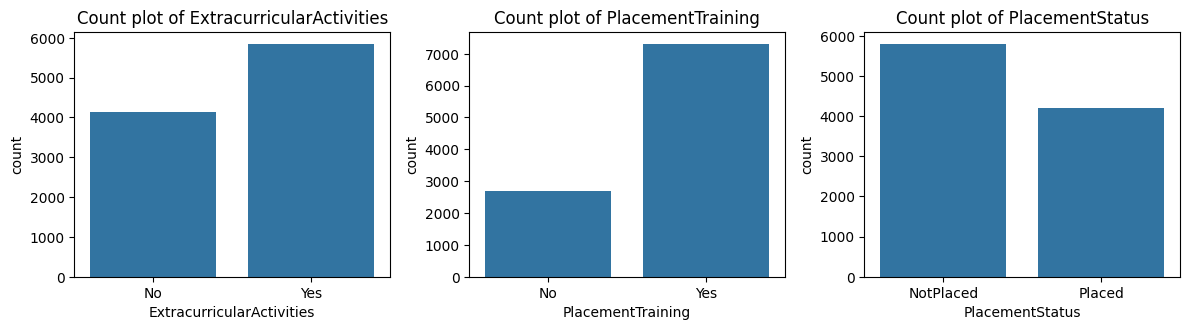

In [10]:
plt.figure(figsize=(12,6))
for i , col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x = data[col])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()